In [1]:
### in this task missing numerical values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [4]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

#### Question 1 - Solution

In [24]:
pd.DataFrame({
    'price': ['numerical-continuous'],
    'pages': ['numerical-discrete'],
    'avg_reviews': ['numerical-continuous'],
    'n_reviews': ['numerical-discrete'],
    'language': ['categorical-nominal']
})

,price,pages,avg_reviews,n_reviews,language
0,numerical-continuous,numerical-discrete,numerical-continuous,numerical-discrete,categorical-nominal


#### Question 2

In [6]:
### compute Pearson's correlation between pages and weight in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 2 - Solution

In [25]:
# Function to convert weight to pounds
def convert_weight(weight):
    weight = str(weight)
    if 'ounces' in weight:
        # Convert ounces to pounds using the conversion factor
        weight = float(weight.replace('ounces', '')) * 0.065
    else:
        # Convert pounds to float
        weight = float(weight.replace('pounds', ''))
    return weight

# Applying the conversion function to create a new 'weight_in_pounds' column
df['weight_in_pounds'] = df['weight'].apply(convert_weight)

# Filling missing values in 'weight_in_pounds' with the mean value
df['weight_in_pounds'].fillna(df['weight_in_pounds'].mean(), inplace=True)

# Calculating Pearson's correlation between 'pages' and 'weight_in_pounds'
correlation = df['pages'].corr(df['weight_in_pounds'])

# Creating a DataFrame to display the correlation result
correlation_df = pd.DataFrame({"Correlation between 'pages' and 'weight'": [correlation]})

# Styling the DataFrame for better visualization
styled_correlation_df = correlation_df.style.set_properties(**{'text-align': 'center'})

styled_correlation_df

,Correlation between 'pages' and 'weight'
0,0.568145


#### Question 3

In [8]:
### show a scatter plot of pages (x) and weight (y)
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 3 - Solution

<Axes: xlabel='pages', ylabel='weight'>

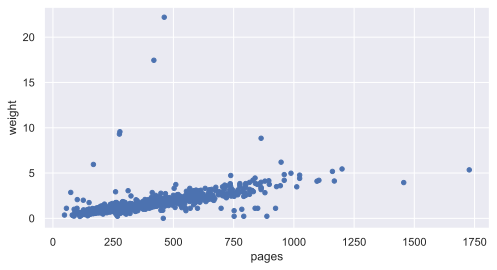

In [28]:
# Creating a scatter plot of 'pages' (x) and 'weight' (y)
df.plot(kind="scatter", x="pages", y="weight_in_pounds", ylabel='weight')

#### Question 4

In [10]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 4 - Solution

In [29]:
# Function to convert dimensions to volume
def convert_dimension(dimension):
    if pd.isna(dimension):
        return dimension
    
    dimension_arr = dimension.split('x', 2)
    dimension_arr[2] = dimension_arr[2].replace('inches', '')
    dimension_arr = [float(dim) for dim in dimension_arr]
    
    return dimension_arr[0] * dimension_arr[1] * dimension_arr[2]

# Applying the conversion function to create a new 'dimensions_size' column
df['dimensions_size'] = df['dimensions'].apply(convert_dimension)

# Filling missing values in 'dimensions_size' with the mean value
df['dimensions_size'].fillna(df['dimensions_size'].mean(), inplace=True)

# Calculating Pearson's correlation between 'dimensions_size' and 'price'
correlation = df['dimensions_size'].corr(df['price'])

# Creating a DataFrame to display the correlation result
correlation_df = pd.DataFrame({"Correlation between 'dimensions_size' and 'price'": [correlation]})

# Styling the DataFrame for better visualization
styled_correlation_df = correlation_df.style.set_properties(**{'text-align': 'center'})

styled_correlation_df

,Correlation between 'dimensions_size' and 'price'
0,0.418720


#### Question 5

In [12]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 5 - Solution

<Axes: xlabel='dimensions_size', ylabel='price'>

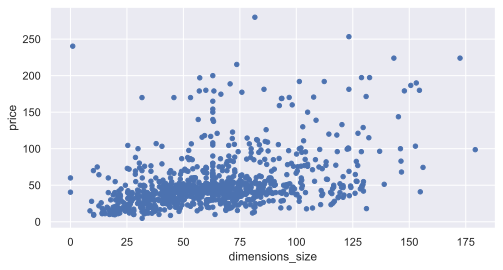

In [30]:
# Creating a scatter plot of 'dimensions_size' (x) and 'price' (y)
df.plot(kind="scatter", x="dimensions_size", y="price")

#### Question 6

In [14]:
### inspect book titles carefully - they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories

#### Question 6 - Solution

In [31]:
# Function to categorize books based on keyphrases in their titles
def Get_book_category(df, categories_df):
    for title in df['title']:
        title = title.lower()
        for category in categories_df['Keyphrases'][:-1]:
            if category in title:
                # Increment the count for the corresponding category
                categories_df.loc[categories_df['Keyphrases'] == category, 'Total'] += 1
                # Increment the total count
                categories_df.loc[categories_df['Keyphrases'] == 'total', 'Total'] += 1
    return categories_df

# Initializing a DataFrame to track book categories and their counts
categories_df = pd.DataFrame({'Keyphrases': ['data science', 'data analytics', 'data engineering',
                                              'machine learning', 'statistics', 'deep learning',
                                              'natural language processing', 'total'], 'Total': 0})

# Applying the function to categorize books based on keyphrases
categories_df = Get_book_category(df, categories_df)

categories_df

,Keyphrases,Total
0,data science,111
1,data analytics,28
2,data engineering,7
3,machine learning,179
4,statistics,128
5,deep learning,138
6,natural language processing,13
7,total,604


#### Question 7

In [16]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 7 - Solution

In [32]:
# Sorting the DataFrame by the number of books in descending order
# Dropping the last row containing the total count
# Setting the 'Keyphrases' column as the new index
sorted_categories_df = categories_df.sort_values(by='Total', ascending=False).drop(categories_df.index[-1]).set_index('Keyphrases')

sorted_categories_df

,Total
Keyphrases,
machine learning,179
deep learning,138
statistics,128
data science,111
data analytics,28
natural language processing,13
data engineering,7


#### Question 8

In [18]:
### sample 10000 values from N~(10, 5)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 8 - Solution

In [33]:
import numpy as np
from statistics import NormalDist

# Sample 10000 values from a normal distribution with mean 10 and standard deviation 5
n_sample = np.random.normal(10, 5, 10000)

# Define mean and standard deviation
mean = 10
std = 5

# Calculate the portion using z table
z = NormalDist().cdf((2.5 - mean)/std)
calculated_result = 1 - z*2

# Compute empirical portion using sampled values
empirical_result = (np.sum((n_sample > 2.5) & (n_sample < 17.5))) / 10000

# Display both calculated and empirical portions
pd.DataFrame({'Calculated': [calculated_result], 'Empirical': [empirical_result]})

,Calculated,Empirical
0,0.866386,0.8653


#### Question 9

In [20]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 9 - Solution

In [21]:
def confidence_interval(data, alpha):
    # Calculate mean, standard deviation, and sample size
    mean, std, n = data.mean(), data.std(), len(data)
    
    # Calculate z-score for the desired confidence level
    z = NormalDist().inv_cdf(1 - alpha/2)
    
    # Calculate left and right boundaries of the confidence interval
    left, right = mean - z*std/(n**0.5), mean + z*std/(n**0.5)
    
    return left, right

def print_confidence_interval(alpha, left, right):
    # Display confidence interval boundaries
    display(pd.DataFrame({'Side': ['Left', 'Right'], f'Confidence interval of {(int)((1 - alpha) * 100)}% \
    for the true population mean of a book price on Amazon': [left, right]}).style.set_properties(**{'text-align': 'center'}))

# Set the desired confidence level (alpha)
alpha = 0.05

# Calculate and print the confidence interval for the true population mean of book prices
left, right = confidence_interval(df['price'], alpha)
print_confidence_interval(alpha, left, right)


,Side,Confidence interval of 95% for the true population mean of a book price on Amazon
0,Left,49.771823
1,Right,54.435232


#### Question 10

In [22]:
### can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 53.0] interval?
### show your computations, and print your answer: yes or no

#### Question 10 - Solution

In [34]:
# Set the desired confidence level (alpha)
alpha = 0.15

# Calculate the confidence interval for the true population mean of book prices
left, right = confidence_interval(df['price'], alpha)

# Print the confidence interval boundaries
print_confidence_interval(alpha, left, right)

# Display the answer based on the specified interval [50.0, 53.0]
pd.DataFrame({'Answer': ['No']})

,Side,Confidence interval of 85% for the true population mean of a book price on Amazon
0,Left,50.390964
1,Right,53.816091


,Answer
0,No
